Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## **Data Collection**

In [2]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('/content/winequalityN.csv')

In [3]:
# number of rows & columns in the dataset
wine_dataset.shape

(6497, 13)

In [4]:
# first 5 rows of the dataset
wine_dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## **Data Pre-processing**

In [5]:
# checking for missing values
wine_dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

*Handling Missing Values*

In [6]:
# replacing missing values with mean
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan,strategy='mean')

impute.fit(wine_dataset[['fixed acidity']])
wine_dataset['fixed acidity'] = impute.transform(wine_dataset[['fixed acidity']])

impute.fit(wine_dataset[['volatile acidity']])
wine_dataset['volatile acidity'] = impute.transform(wine_dataset[['volatile acidity']])

impute.fit(wine_dataset[['citric acid']])
wine_dataset['citric acid'] = impute.transform(wine_dataset[['citric acid']])

impute.fit(wine_dataset[['residual sugar']])
wine_dataset['residual sugar'] = impute.transform(wine_dataset[['residual sugar']])

impute.fit(wine_dataset[['chlorides']])
wine_dataset['chlorides'] = impute.transform(wine_dataset[['chlorides']])

impute.fit(wine_dataset[['pH']])
wine_dataset['pH'] = impute.transform(wine_dataset[['pH']])

impute.fit(wine_dataset[['sulphates']])
wine_dataset['sulphates'] = impute.transform(wine_dataset[['sulphates']])

In [7]:
wine_dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

*Data Analysis and Visulaization*

In [8]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


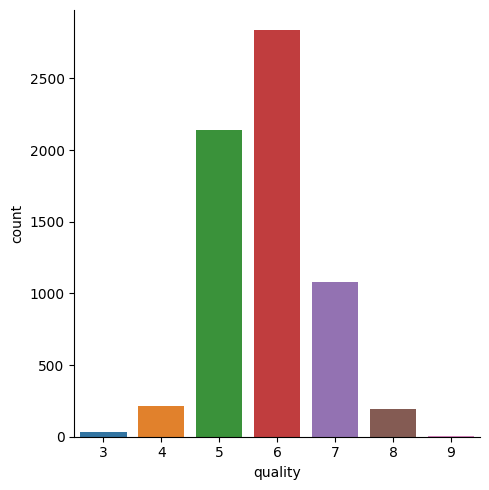

In [9]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='fixed acidity'>

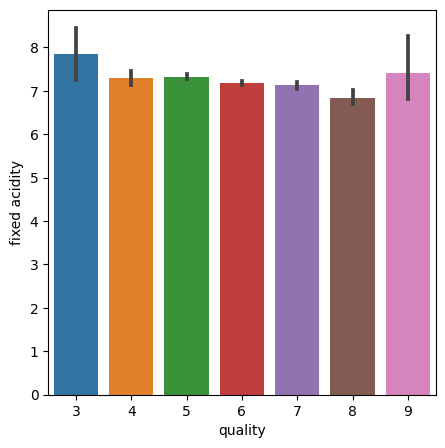

In [10]:
# fixed acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'fixed acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='volatile acidity'>

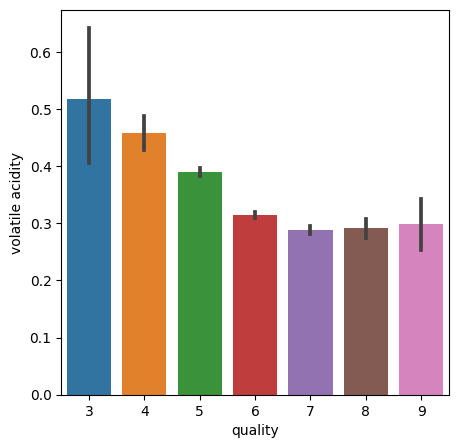

In [11]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

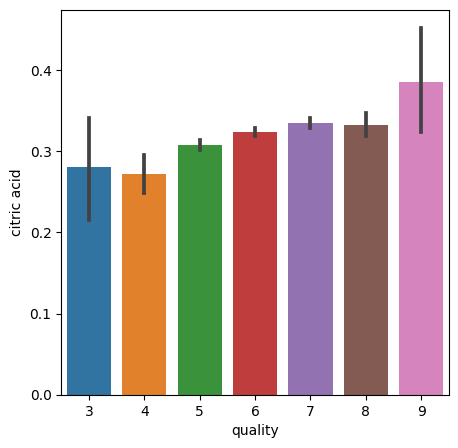

In [12]:
# citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

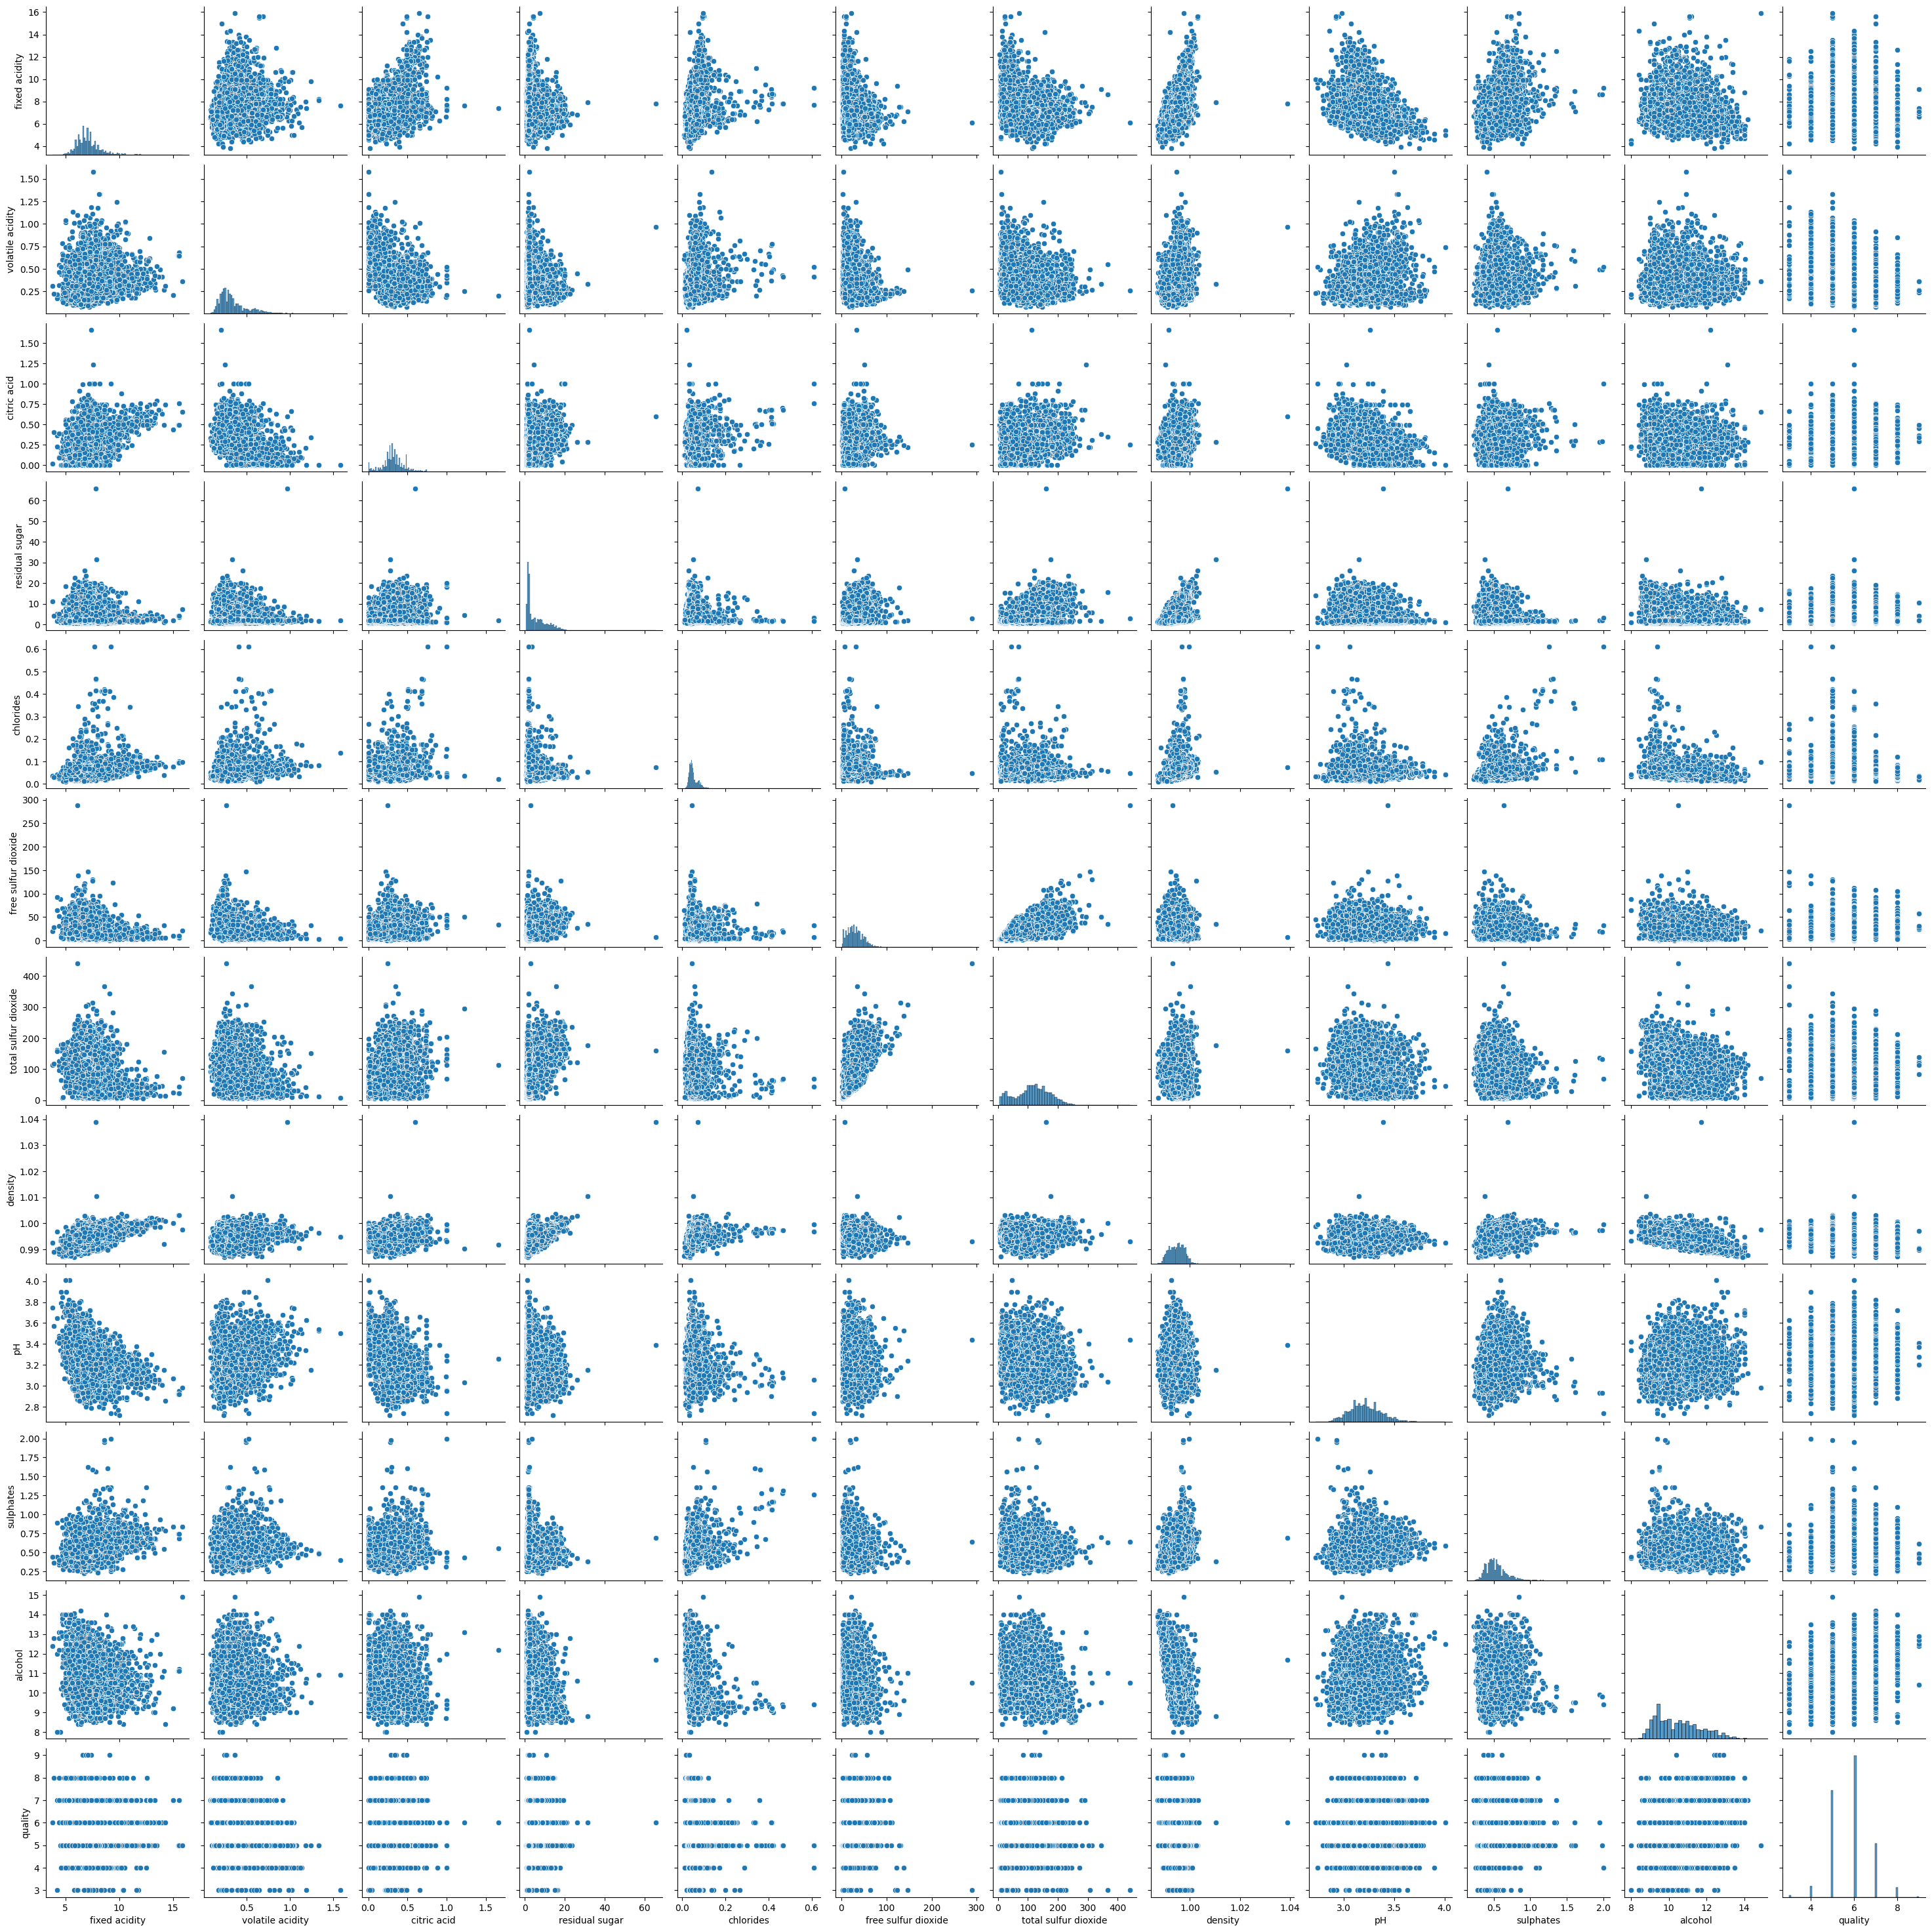

In [13]:
# plot pairplot
sns.pairplot(wine_dataset)
plt.show()

*Feature Selection*

<ipython-input-14-5477bb206102>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = wine_dataset.corr()


<Axes: >

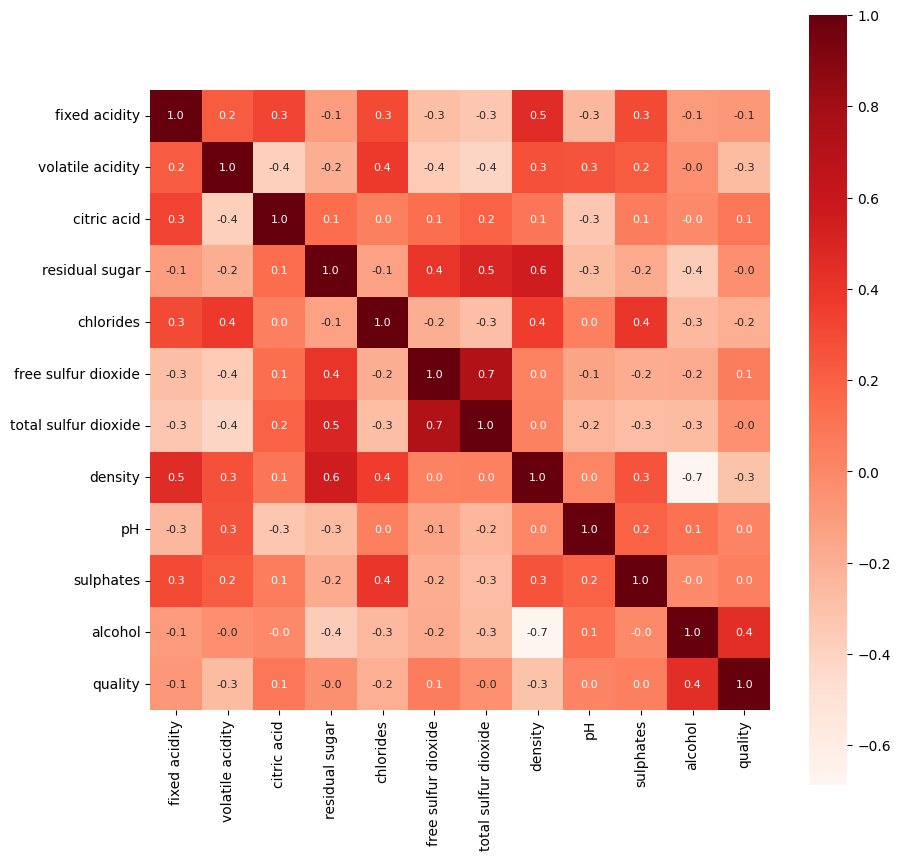

In [14]:
# constructing a heatmap to understand the correlation between the columns
correlation = wine_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Reds')

In [15]:
# considering correlation more than 0.7 to be highly correlated and removing those features
highlycorrelated = []
# loop for columns
for i in range(len(wine_dataset.corr().keys())):
# loop for rows
  for j in range(i):
    if abs(wine_dataset.corr().iloc[i,j]) > 0.7:
      highlycorrelated.append(wine_dataset.corr().columns[i])
print(highlycorrelated)

<ipython-input-15-7ffff9f52037>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for i in range(len(wine_dataset.corr().keys())):
<ipython-input-15-7ffff9f52037>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  if abs(wine_dataset.corr().iloc[i,j]) > 0.7:
<ipython-input-15-7ffff9f52037>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  highlycorrelated.append(wine_dataset.corr().columns[i])


['total sulfur dioxide']


In [16]:
for i in highlycorrelated:
  wine_dataset = wine_dataset.drop(i,axis = 1)

In [17]:
print(wine_dataset)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  density    pH  sulphates  alcohol  \


*Encoding Categorical Features*

In [18]:
# converting type 'white' to 1 and type 'red' to 0
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
wine_dataset['type'] = enc.fit_transform(wine_dataset['type'])

In [19]:
print(wine_dataset)

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.0             0.270         0.36            20.7   
1        1            6.3             0.300         0.34             1.6   
2        1            8.1             0.280         0.40             6.9   
3        1            7.2             0.230         0.32             8.5   
4        1            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6492     0            6.2             0.600         0.08             2.0   
6493     0            5.9             0.550         0.10             2.2   
6494     0            6.3             0.510         0.13             2.3   
6495     0            5.9             0.645         0.12             2.0   
6496     0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  density    pH  sulphates  alcohol  \
0         0.

*Label Binarizaton*

In [20]:
# converting quality values to 0 and 1
wine_dataset['binary quality']=[1 if x>=7 else 0 for x in wine_dataset.quality]

In [21]:
print(wine_dataset)

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.0             0.270         0.36            20.7   
1        1            6.3             0.300         0.34             1.6   
2        1            8.1             0.280         0.40             6.9   
3        1            7.2             0.230         0.32             8.5   
4        1            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6492     0            6.2             0.600         0.08             2.0   
6493     0            5.9             0.550         0.10             2.2   
6494     0            6.3             0.510         0.13             2.3   
6495     0            5.9             0.645         0.12             2.0   
6496     0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  density    pH  sulphates  alcohol  \
0         0.

*Train & Test Split*

In [22]:
# independent variables
X = wine_dataset.drop(['quality','binary quality'],axis=1)
# dependent variable
Y = wine_dataset['binary quality']

In [23]:
# 20% data for testing and 80% data for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [24]:
print(Y.shape, Y_train.shape, Y_test.shape)

(6497,) (5197,) (1300,)


*Feature Scaling*



In [25]:
# scaling data using minmaxscaler to keep all data between 0 and 1 so that all features get similar importance
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)

[[0.         0.48760331 0.14333333 ... 0.3255814  0.15819209 0.42028986]
 [0.         0.54545455 0.23333333 ... 0.29457364 0.36158192 0.49275362]
 [0.         0.38016529 0.42333333 ... 0.45736434 0.23163842 0.20289855]
 ...
 [1.         0.18181818 0.12       ... 0.44186047 0.15254237 0.68115942]
 [1.         0.23966942 0.11333333 ... 0.64341085 0.2259887  0.20289855]
 [0.         0.23140496 0.43       ... 0.48837209 0.14689266 0.4057971 ]]


*PCA Feature Selection*

In [26]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#X_train_scaled_pca = pca.fit_transform(X_train_scaled)
#X_test_scaled_pca = pca.fit_transform(X_test_scaled)
#print(pca.explained_variance_ratio_)

## **Model Training and Accuracy**



*Random Forest Classifier*

In [27]:
# training
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, Y_train)

RandomForestClassifier()

In [28]:
# testing
X_test_predictions = rf.predict(X_test_scaled)
rf_score = classification_report(Y_test, X_test_predictions)
print(rf_score)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1047
           1       0.76      0.58      0.66       253

    accuracy                           0.88      1300
   macro avg       0.83      0.77      0.79      1300
weighted avg       0.88      0.88      0.88      1300



*Logistic Regression*

In [29]:
# training
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, Y_train)

LogisticRegression()

In [30]:
# testing
X_test_predictions = lr.predict(X_test_scaled)
lr_score = classification_report(Y_test, X_test_predictions)
print(lr_score)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1047
           1       0.63      0.25      0.35       253

    accuracy                           0.82      1300
   macro avg       0.73      0.60      0.63      1300
weighted avg       0.80      0.82      0.79      1300



*Naive Bayes*

In [31]:
# training
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, Y_train)

GaussianNB()

In [32]:
# testing
X_test_predictions = gnb.predict(X_test_scaled)
gnb_score = classification_report(Y_test, X_test_predictions)
print(gnb_score)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1047
           1       0.39      0.66      0.49       253

    accuracy                           0.73      1300
   macro avg       0.65      0.70      0.66      1300
weighted avg       0.80      0.73      0.76      1300



*Support Vector Classifier*

In [33]:
# training
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled, Y_train)

SVC()

In [34]:
# testing
X_test_predictions = svc.predict(X_test_scaled)
svc_score = classification_report(Y_test, X_test_predictions)
print(svc_score)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1047
           1       0.66      0.18      0.28       253

    accuracy                           0.82      1300
   macro avg       0.75      0.58      0.59      1300
weighted avg       0.80      0.82      0.78      1300

